<a href="https://colab.research.google.com/github/sharonma1218/stats-306/blob/main/lecture05_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('nycflights13')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
options(repr.plot.width=8, repr.plot.height=5)
library(tidyverse)
library(nycflights13)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## &#129300; (Warmup) Quiz

```
  origin 1    2    3     4     5     6     7     8     9    10    11   12  
1 EWR    9893 9107 10420 10531 10592 10175 10475 10359 9550 10104 9707 9922
2 JFK    9161 8421  9697  9218  9397  9472 10023  9983 8908  9143 8710 9146
3 LGA    7950 7423  8717  8581  8807  8596  8927  8985 9116  9642 8851 9067
```

How could I convert this table to a tidy format? (Check all that apply)

<ol style="list-style-type: upper-alpha;">
    <li><code>pivot_longer(tbl, 1:12)</code></li>
    <li><code>mutate(tbl, year=.column)</code></li>
    <li><code>summarize(tbl, year)</code></li>
    <li><code>pivot_longer(tbl, 2:13)</code></li>
    <li><code>pivot_longer(tbl, -origin)</code></li>
</ol>

In [ ]:
# solution
tb1<-flights%>%
  group_by(origin,month)%>%
  summarize(n=n())%>%
  pivot_wider(names_from=month,values_from=n)%>%
  print

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


# A tibble: 3 × 13
# Groups:   origin [3]
  origin   `1`   `2`   `3`   `4`   `5`   `6`   `7`   `8`   `9`  `10`  `11`  `12`
  <chr>  <int> <int> <int> <int> <int> <int> <int> <int> <int> <int> <int> <int>
1 EWR     9893  9107 10420 10531 10592 10175 10475 10359  9550 10104  9707  9922
2 JFK     9161  8421  9697  9218  9397  9472 10023  9983  8908  9143  8710  9146
3 LGA     7950  7423  8717  8581  8807  8596  8927  8985  9116  9642  8851  9067


In [ ]:
pivot_longer(tb1,2:13)
# 1 doesn't work b/c col 1 is actually origin. the 1 to 12 months that we see are 
# actually columns 2 to 13

origin,name,value
<chr>,<chr>,<int>
EWR,1,9893
EWR,2,9107
EWR,3,10420
EWR,4,10531
EWR,5,10592
EWR,6,10175
EWR,7,10475
EWR,8,10359
EWR,9,9550


# Lecture 5: Tidy data, missing data

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Gain more experience creating and working with tidy data
* Learn about how R handles missing data.
    
This lecture note corresponds to Chapters 6 and 20 of your book. 
</div>


    




## Questions from Piazza and e-mail
- "I don't understand how `pivot_wider()` works"

## How `pivot_wider()` works
Here's a simple untidy dataset:

In [ ]:
df <- tribble(
  ~id, ~name, ~value,
  "A", "x", 1,
  "B", "y", 2,
  "B", "x", 3, 
  "A", "y", 4,
  "A", "z", 5,
)

In [ ]:
df

id,name,value
<chr>,<chr>,<dbl>
A,x,1
B,y,2
B,x,3
A,y,4
A,z,5


(Why is it untidy?)

In [ ]:
# First how do we make df tidy?

Here's how `pivot_wider()` got this answer:

First, we have to figure out what are the new column names:

In [ ]:
# figure out all the new column names

Next, we have to figure out all the rows that will exist in the new tabel. 
By default, the rows in the output are formed by all the variables that aren’t going into the names or values. 
(These are called the id_cols.)

In [ ]:
# figure out all the new rows

Finall, we have to fill in all the empty cells of this table by looking them up in the original table.

## A usage of `pivot_wider()`
Let's revisit the `gapminder` dataset that we first saw last lecture:

In [ ]:
install.packages('gapminder')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(gapminder)
print(gapminder)

# A tibble: 1,704 × 6
   country     continent  year lifeExp      pop gdpPercap
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
 1 Afghanistan Asia       1952    28.8  8425333      779.
 2 Afghanistan Asia       1957    30.3  9240934      821.
 3 Afghanistan Asia       1962    32.0 10267083      853.
 4 Afghanistan Asia       1967    34.0 11537966      836.
 5 Afghanistan Asia       1972    36.1 13079460      740.
 6 Afghanistan Asia       1977    38.4 14880372      786.
 7 Afghanistan Asia       1982    39.9 12881816      978.
 8 Afghanistan Asia       1987    40.8 13867957      852.
 9 Afghanistan Asia       1992    41.7 16317921      649.
10 Afghanistan Asia       1997    41.8 22227415      635.
# … with 1,694 more rows


I want to study GDP per capita over time. If I plot **all** the data, I get something that looks like:

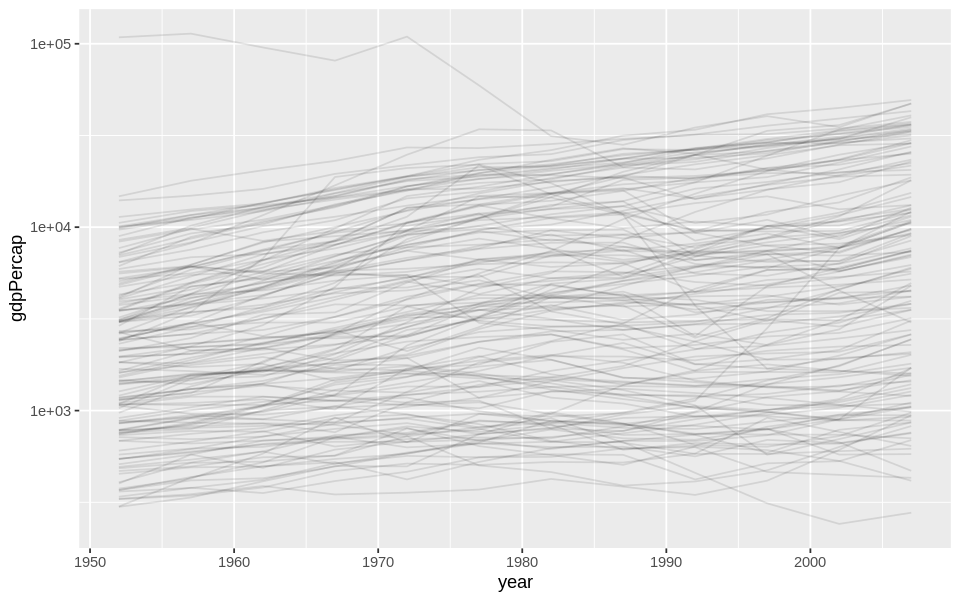

In [ ]:
ggplot(gapminder, 
aes(x = year, y=gdpPercap, group=country)) + 
  geom_line(alpha=0.1) + scale_y_log10()

Looking at all the data simultaneousy is too overwhelming. So, I'm going to summarize the data in a particular way. As a first step, we are going convert each country into a data point (row) containing all of its data side-by-side:

In [ ]:
# convert gapminder to wide, placing different years of data side-by-side
# w/o specifying that the observations are the countries:
col_year<-pivot_wider(
  gapminder,
  names_from=year,
  values_from=gdpPercap)%>% # i only care about gdp per cap over time
    print
# lots of NAs

# A tibble: 1,704 × 16
   country     contin…¹ lifeExp    pop `1952` `1957` `1962` `1967` `1972` `1977`
   <fct>       <fct>      <dbl>  <int>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
 1 Afghanistan Asia        28.8 8.43e6   779.    NA     NA     NA     NA     NA 
 2 Afghanistan Asia        30.3 9.24e6    NA    821.    NA     NA     NA     NA 
 3 Afghanistan Asia        32.0 1.03e7    NA     NA    853.    NA     NA     NA 
 4 Afghanistan Asia        34.0 1.15e7    NA     NA     NA    836.    NA     NA 
 5 Afghanistan Asia        36.1 1.31e7    NA     NA     NA     NA    740.    NA 
 6 Afghanistan Asia        38.4 1.49e7    NA     NA     NA     NA     NA    786.
 7 Afghanistan Asia        39.9 1.29e7    NA     NA     NA     NA     NA     NA 
 8 Afghanistan Asia        40.8 1.39e7    NA     NA     NA     NA     NA     NA 
 9 Afghanistan Asia        41.7 1.63e7    NA     NA     NA     NA     NA     NA 
10 Afghanistan Asia        41.8 2.22e7    NA     NA     NA     NA     NA     NA 
# … w

In [ ]:
# specifying that the observations are the countries: 
col_year<-pivot_wider(
  gapminder,
  id_cols=country,
  names_from=year,
  values_from=gdpPercap)%>%
    print
# no more repeats (each country has its own row)
# no more NAs 

# A tibble: 142 × 13
   country `1952` `1957` `1962` `1967` `1972` `1977` `1982` `1987` `1992` `1997`
   <fct>    <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
 1 Afghan…   779.   821.   853.   836.   740.   786.   978.   852.   649.   635.
 2 Albania  1601.  1942.  2313.  2760.  3313.  3533.  3631.  3739.  2497.  3193.
 3 Algeria  2449.  3014.  2551.  3247.  4183.  4910.  5745.  5681.  5023.  4797.
 4 Angola   3521.  3828.  4269.  5523.  5473.  3009.  2757.  2430.  2628.  2277.
 5 Argent…  5911.  6857.  7133.  8053.  9443. 10079.  8998.  9140.  9308. 10967.
 6 Austra… 10040. 10950. 12217. 14526. 16789. 18334. 19477. 21889. 23425. 26998.
 7 Austria  6137.  8843. 10751. 12835. 16662. 19749. 21597. 23688. 27042. 29096.
 8 Bahrain  9867. 11636. 12753. 14805. 18269. 19340. 19211. 18524. 19036. 20292.
 9 Bangla…   684.   662.   686.   721.   630.   660.   677.   752.   838.   973.
10 Belgium  8343.  9715. 10991. 13149. 16672. 19118. 20980. 22526. 25576. 27561.
# … wit

Now `col_year` is a **data frame** that contains one observation per row. This enables us to ask questions about **covariation** between the data in different years.

In [ ]:
?cov
# how two variables differ 

In [ ]:
# example of covariation between two different years
cov(col_year$"1952",col_year$"1957")

[1] 91842671

## &#129300; Quiz

The correlation between a country's GDP per capita in 1952 and 2002 was:

<ol style="list-style-type: upper-alpha;">
    <li>0.0</li>
    <li>-.21</li>
    <li>1.65</li>
    <li>44822176</li>
    <li>.43</li> 
</ol>

In [ ]:
cor(col_year$"1952",col_year$"2002")

[1] 0.4311142

Finally, we'll do one more trick, following Chapter 6 of the book. We will **cluster** these data in order to organize the countries into a few (hopefully) interpretable groups. 

For technical reasons, in order to do clustering, we need to convert our data frame slightly by using a function called `columns_to_rownames()`:

In [ ]:
# use `columns_to_rownames()` to create a base R data frame with named rows.
col_year<-col_year%>%
  column_to_rownames("country")%>%
  print

In [ ]:
cluster <- stats::kmeans(col_year, centers = 6)

Finally, we assign each country back to its cluster:

In [ ]:
cluster_id <- cluster$cluster  %>% 
  enframe()  %>% 
  rename(country = name, cluster_id = value) %>% print
# the abs value of the cluster id does not matter. all that matters is that similar countries have the same number.

# A tibble: 142 × 2
   country     cluster_id
   <chr>            <int>
 1 Afghanistan          4
 2 Albania              5
 3 Algeria              5
 4 Angola               5
 5 Argentina            2
 6 Australia            1
 7 Austria              1
 8 Bahrain              1
 9 Bangladesh           4
10 Belgium              1
# … with 132 more rows


In [ ]:
# join cluster_id and summarize the mean gdpPercap for each cluster and each country 

df3<-gapminder%>%
  left_join(cluster_id)%>%
  group_by(cluster_id,year)%>%
  summarize(mean=mean(gdpPercap))

df3%>%print

# all the countries that belong to this cluster for each yr, what is its mean gdp?
# now we want to plot this 

Joining, by = "country"
`summarise()` has grouped output by 'cluster_id'. You can override using the
`.groups` argument.


# A tibble: 72 × 3
# Groups:   cluster_id [6]
   cluster_id  year   mean
        <int> <int>  <dbl>
 1          1  1952  8504.
 2          1  1957 10135.
 3          1  1962 11920.
 4          1  1967 14456.
 5          1  1972 17853.
 6          1  1977 20367.
 7          1  1982 22012.
 8          1  1987 24010.
 9          1  1992 25920.
10          1  1997 28519.
# … with 62 more rows


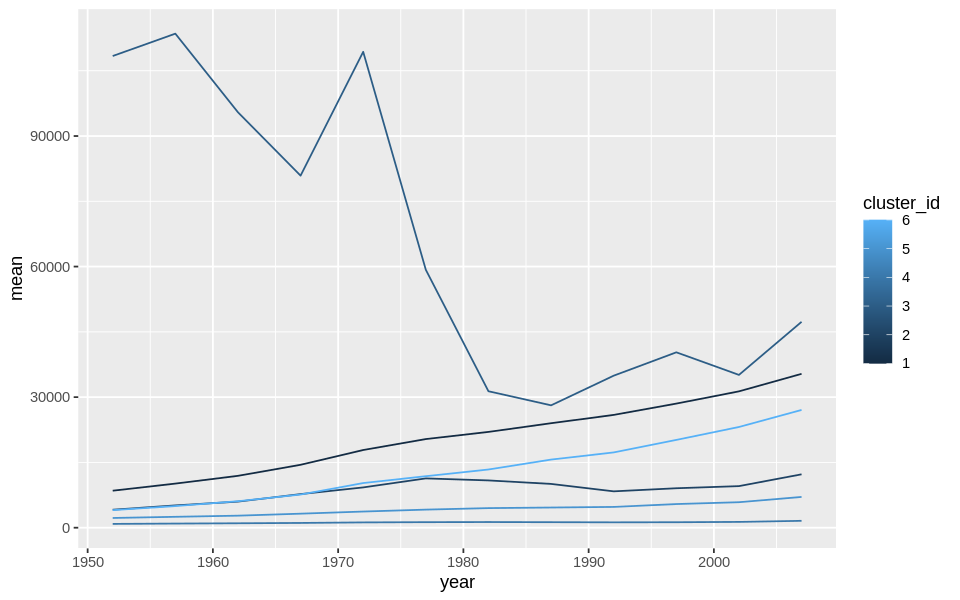

In [ ]:
# plot mean gdppercap for each country in each cluster
df3%>%
  ggplot(mapping=aes(x=year,y=mean,group=cluster_id))+
  geom_line(aes(color=cluster_id)) # now we should have diff colors for diff clusters. but now we have shades of same color.

In [ ]:
print(table2)

# A tibble: 12 x 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


## Missing data in R
The `gapminder` appears very nice, it only contains data sets with no missing observations. But! The raw data looks like this:

In [ ]:
gapminder_unfiltered  %>% print

# A tibble: 3,313 × 6
   country     continent  year lifeExp      pop gdpPercap
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
 1 Afghanistan Asia       1952    28.8  8425333      779.
 2 Afghanistan Asia       1957    30.3  9240934      821.
 3 Afghanistan Asia       1962    32.0 10267083      853.
 4 Afghanistan Asia       1967    34.0 11537966      836.
 5 Afghanistan Asia       1972    36.1 13079460      740.
 6 Afghanistan Asia       1977    38.4 14880372      786.
 7 Afghanistan Asia       1982    39.9 12881816      978.
 8 Afghanistan Asia       1987    40.8 13867957      852.
 9 Afghanistan Asia       1992    41.7 16317921      649.
10 Afghanistan Asia       1997    41.8 22227415      635.
# … with 3,303 more rows


In [ ]:
# What happens when we reshape the "unfiltered" data?
# pivot unfiltered data wider
gapminder_unfiltered%>%
  pivot_wider(id_cols=country,names_from=year,values_from=gdpPercap)%>%
  print
# the moment you make tibble wider, can no longer hide the NA values 

# A tibble: 187 × 59
   country `1952` `1957` `1962` `1967` `1972` `1977` `1982` `1987` `1992` `1997`
   <fct>    <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
 1 Afghan…   779.   821.   853.   836.   740.   786.   978.   852.   649.   635.
 2 Albania  1601.  1942.  2313.  2760.  3313.  3533.  3631.  3739.  2497.  3193.
 3 Algeria  2449.  3014.  2551.  3247.  4183.  4910.  5745.  5681.  5023.  4797.
 4 Angola   3521.  3828.  4269.  5523.  5473.  3009.  2757.  2430.  2628.  2277.
 5 Argent…  5911.  6857.  7133.  8053.  9443. 10079.  8998.  9140.  9308. 10967.
 6 Armenia    NA     NA     NA     NA     NA     NA     NA     NA   1443.  1791.
 7 Aruba      NA     NA     NA     NA   4940.  7390. 10875. 17674. 25121. 26484.
 8 Austra… 10040. 10950. 12217. 14526. 16789. 18334. 19477. 21889. 23425. 26998.
 9 Austria  6137.  8843. 10751. 12835. 16662. 19749. 21597. 23688. 27042. 29096.
10 Azerba…    NA     NA     NA     NA     NA     NA     NA     NA   3456.  1943.
# … wit

You can see that there are many missing observations in the unfiltered data. In real life, you will mostly get unfiltered data -- how should we handle missing data?

## Missing Values
Missing values can be:

* **Explicit** (marked as `NA` in our data); or
* **Implicit** (not present in the data).

In [ ]:
treatment <- tribble(
  ~person,           ~treatment, ~response,
  "Derrick Whitmore", 1,         7,
  NA,                 2,         10,
  NA,                 3,         NA,
  "Katherine Burke",  1,         4
)

In [ ]:
treatment

person,treatment,response
<chr>,<dbl>,<dbl>
Derrick Whitmore,1,7
NA,2,10
NA,3,NA
Katherine Burke,1,4


The missing values are **explicit** in this table: each missing value is indicated by `NA` in the table.

You can fill in these missing values with `tidyr::fill()`. It works like `select()`, taking a set of columns, and fills them in with the last non-missing value.

In [ ]:
# fill treatment for person & response cols
fill(treatment,person,response) 
# now the "person" & "response" cols don't have NAs

person,treatment,response
<chr>,<dbl>,<dbl>
Derrick Whitmore,1,7
Derrick Whitmore,2,10
Derrick Whitmore,3,10
Katherine Burke,1,4


In [ ]:
# fill in each missing value in gapminder_unfiltered carrying forward


person,treatment,response
<chr>,<dbl>,<dbl>
Derrick Whitmore,1,7
Derrick Whitmore,2,10
Derrick Whitmore,3,10
Katherine Burke,1,4


## Encoded missing data

Sometimes, data contain a concrete value that actually represents a missing value. You see this often when dealing with data that is imported from a format that does not have a way to represent missing values, such as text or CSV. So it must instead use some special value like 99 or -999.

## Example: Billionaires

The following command loads a dataset called "bil", which contains information on the world's billionaires:

In [ ]:
load(url("https://datasets.stats306.org/bil.RData"))
summary(bil),

      age          category         citizenship        company.name      
 Min.   :-1.00   Length:2614        Length:2614        Length:2614       
 1st Qu.:47.00   Class :character   Class :character   Class :character  
 Median :59.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :53.21                                                           
 3rd Qu.:70.00                                                           
 Max.   :98.00                                                           
                                                                         
 company.type       country code          founded     from emerging     
 Length:2614        Length:2614        Min.   :1610   Length:2614       
 Class :character   Class :character   1st Qu.:1938   Class :character  
 Mode  :character   Mode  :character   Median :1963   Mode  :character  
                                       Mean   :1955                     
                                       3rd 

## &#129300; Quiz

The average age of a billionaire in this dataset is:

<ol style="list-style-type: upper-alpha;">
    <li>28.1</li>
    <li>Something else/cannot be determined</li>
    <li>53.2</li>
    <li>78.3</li>
    <li>62.6</li> 
</ol>

To correct for this type of missing value, we can use a function called `na_if(x, n)`. This takes a vector `x` and replaces any occurence of `n` with `NA`:

In [ ]:
na_if(c(-99, 1, 3, -99, 2), -99)

[1] NA  1  3 NA  2

In [ ]:
# use na_if to mark missing values in bil

## Implicit missing values
A second type of missing data occurs when there are simply no observations in the dataset for a particular combination of columns. For example:

In [ ]:
stocks <- tibble(
  year  = c(2020, 2020, 2020, 2020, 2021, 2021, 2021),
  qtr   = c(   1,    2,    3,    4,    2,    3,    4),
  price = c(1.88, 0.59, 0.35,   NA, 0.92, 0.17, 2.66)
)

In [ ]:
print(stocks)

# A tibble: 7 × 3
   year   qtr price
  <dbl> <dbl> <dbl>
1  2020     1  1.88
2  2020     2  0.59
3  2020     3  0.35
4  2020     4 NA   
5  2021     2  0.92
6  2021     3  0.17
7  2021     4  2.66


This dataset has two missing observations:
- The price in the 2020q4 is explicitly missing. (It has an `NA`.)
- The price in 2021q1 is implicitly missing: it does not appear in the dataset.

> An explicit missing value is the presence of an absence.
>
> An implicit missing value is the absence of a presence.


How can we handle implicit missing values? As we have already seen, one option is to use `pivot_wider()`:

In [ ]:
# using pivot_wider() on stocks converts implicit missing values to explicit

Alternatively, we can use the `complete()` function, which creates entries for all possible combinations of a set of columns:

In [ ]:
# use complete to fill in missing values for stocks

year,qtr,price
<dbl>,<dbl>,<dbl>
2020,1,1.88
2020,2,0.59
2020,3,0.35
2020,4,NA
2021,1,NA
2021,2,0.92
2021,3,0.17
2021,4,2.66


## Example: Climate data

The [Global Historical Climate Network](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) is amazing database of daily weather data going back, in some cases, >100 years. I downloaded daily observation data for Ann Arbor from 1991 to present:

Questions about these data:
- What do the columns mean? 
- What are the units? How can we find this information out?
- How is missing data indicated?
- What questions can we ask about these data?
  - Are the data in an appropriate format to answer these questions?
  - If not, how can we get them there?

In [ ]:
# 